# **Matrix Squaring, Trotter Formula and Path-Integral Quantum Monte Carlo**

Diego Alejandro Ríos Pérez

Grupo de Fenomenología de Interacciones Fundamentales





---




# **Aplicación de la fórmula de Trotter para $\beta$ de alta temperatura a baja temperatura:**

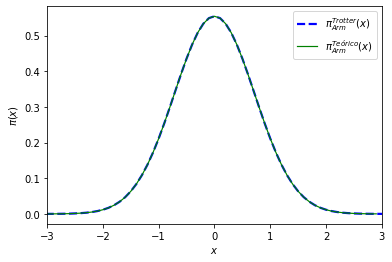

In [ ]:
import math, numpy, pylab
import matplotlib.pyplot as plt
 
def rho_free(x, xp, beta):
  return (math.exp(-(x - xp) ** 2 / (2 * beta) ) /
          math.sqrt(2 * math.pi * beta))
  
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-beta * (x ** 2 + xp ** 2) / 4) \
                         for x in grid] for xp in grid])

x_max = 5
nx = 100
dx = 2 * x_max / nx
x = [i * dx for i in range(-int((nx - 1) / 2 + 1), int((nx +1) / 2 + 1)) ]

beta_tmp = 2 ** (-5)
beta     = 4
rho = rho_harmonic_trotter(x, beta_tmp)

while beta_tmp < beta:
      rho = numpy.dot(rho, rho)
      rho = rho * dx
      beta_tmp = 2 * beta_tmp
 
Z = sum(rho[j,j] for j in range(nx + 1)) * dx
pi_of_x = [rho[j,j] / Z for j in range(nx + 1)]
f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j,j] / Z) + '\n')
f.close()

pylab.xlim(-3,3)
plt.plot(x , pi_of_x, linewidth = 2.2, c = 'blue', linestyle='--')

x = numpy.arange(-3,3,0.1)
pi_of_x_theorical = pow(2 * math.pi * math.sinh(4) , -0.5) * numpy.exp(- (x ** 2) * math.tanh(2)) * 2 * math.sinh(2)
plt.plot(x , pi_of_x_theorical, linewidth = 1.2, c = 'g')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "$\pi^{Teórico}_{Arm}(x)$"], loc ="upper right")



---



# **Aplicación de la fórmula de Trotter para $\beta$ de baja temperatura a baja temperatura (NO FUNCIONA, POR LO TANTO):**

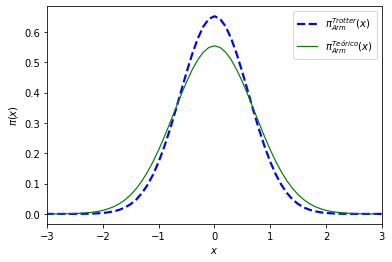

In [ ]:
import math, numpy, pylab
import matplotlib.pyplot as plt
 
def rho_free(x, xp, beta):
  return (math.exp(-(x - xp) ** 2 / (2 * beta) ) /
          math.sqrt(2 * math.pi * beta))
  
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-beta * (x ** 2 + xp ** 2) / 4) \
                         for x in grid] for xp in grid])

x_max = 5
nx = 100
dx = 2 * x_max / nx
x = [i * dx for i in range(-int((nx - 1) / 2 + 1), int((nx +1) / 2 + 1)) ]

beta_tmp = 2
beta     = 4
rho = rho_harmonic_trotter(x, beta_tmp)

while beta_tmp < beta:
      rho = numpy.dot(rho, rho)
      rho = rho * dx
      beta_tmp = 2 * beta_tmp
 
Z = sum(rho[j,j] for j in range(nx + 1)) * dx
pi_of_x = [rho[j,j] / Z for j in range(nx + 1)]

pylab.xlim(-3,3)
plt.plot(x , pi_of_x, linewidth = 2.2, c = 'blue', linestyle='--')

x = numpy.arange(-3,3,0.1)
pi_of_x_theorical = pow(2 * math.pi * math.sinh(4) , -0.5) * numpy.exp(- (x ** 2) * math.tanh(2)) * 2 * math.sinh(2)
plt.plot(x , pi_of_x_theorical, linewidth = 1.2, c = 'g')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "$\pi^{Teórico}_{Arm}(x)$"], loc ="upper right")


---

Logaritmo natural de la función de partición

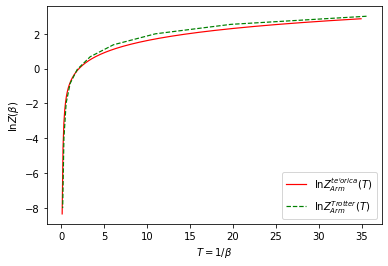

In [ ]:
import math, numpy
import matplotlib.pyplot as plt
import numpy as np
 
def rho_free(x, xp, beta):
  return (math.exp(-(x -xp) **2 / (2.0 * beta) ) /
          math.sqrt(2.0 * math.pi * beta))
  
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range( -int( (nx - 1) / 2 + 1), int( (nx + 1) / 2 + 1) )]
 
beta_tmp = 2.0 ** (-6)
beta     = 4
rho = rho_harmonic_trotter(x, beta_tmp)

LnZ = []
Beta_TMP = []
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 1.8
    lnZ = math.log(sum(rho[j,j] for j in range(nx+1)) * dx)
    Beta_TMP.append(1/beta_tmp)
    LnZ.append(lnZ)

T = np.arange(0.12,35,0.1)
y = np.log(1 / (2 * np.sinh(1/T)))

plt.plot(T,y, linewidth = 1.2, c = 'r')
plt.plot(Beta_TMP , LnZ, linewidth = 1.2, c = 'g', linestyle='--')

plt.xlabel('$T = 1/β$')
plt.ylabel('$\ln Z(β)$')
plt.legend(["$\ln Z^{te\'orica}_{Arm}(T)$", "$\ln Z^{Trotter}_{Arm}(T)$"], loc ="lower right")

Valor de expectación de la energía

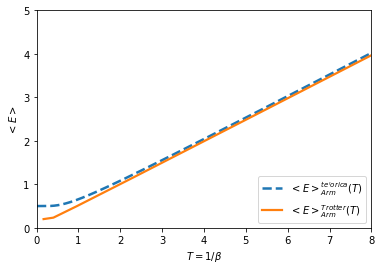

In [ ]:
import math, numpy
import matplotlib.pyplot as plt
import numpy as np
 
def ρ_free(x, xp, β):
  return (math.exp(-(x -xp) **2 / (2.0 * β) ) /
          math.sqrt(2.0 * math.pi * β))
  
def ρ_Trotter(grid, β):
    return np.array([[ρ_free(x, xp, β) * \
                         np.exp(-0.5 * β * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 20
nx = 500
Δx = 2 * x_max / nx
x = [i * Δx for i in range( -int( (nx - 1) / 2 + 2), int( (nx + 1) / 2 + 2) )]
 
β_tmp = pow(2 , -5)
β     = 4
ρ = ρ_Trotter(x, β_tmp)

Temperature = []
LnZ = []
β_list = []
while β_tmp < β:
    ρ = np.dot(ρ, ρ)
    ρ = ρ * Δx
    β_old = β_tmp
    β_tmp = 2.4 * β_tmp
    lnZ = math.log(sum(ρ[j,j] for j in range(nx+1)) * dx)
    Temperature.append(1 / β_tmp)
    β_list.append(β_tmp)
    LnZ.append(lnZ)

Energy = -np.diff(LnZ) / np.diff(β_list)
E = []
for n in Energy:
  E.append(n)
E.append(0.2)
Energy_list = np.array(E)

x = np.arange(0.01, 16, 0.01)
TheorycalEnergy = 1 / (2 * np.tanh(1 / x))

pylab.xlim(0, 8)
pylab.ylim(0,5)
plt.plot(x, TheorycalEnergy, linestyle = '--', linewidth = 2.5)
plt.plot(Temperature, Energy_list, linewidth = 2.2)

plt.xlabel('$T = 1/β$')
plt.ylabel('$< E >$')
plt.legend(["$< E >^{te\'orica}_{Arm}(T)$", "$< E >^{Trotter}_{Arm}(T)$"], loc ="lower right")

Integrales de camino de Feynman
Saltos x\[0\]

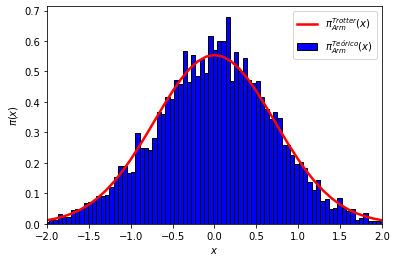

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):
  k = random.randint(0 , N-1)
  k_next , k_prev = (k + 1) % N, (k - 1) % N
  x_new = x[k] + random.uniform(-Δx , Δx)

  old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                ρ_free(x[k] , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x[k] , 2)))
    
  new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                ρ_free(x_new , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x_new , 2)))
    
  if random.uniform(0.0 , 1.0) < new_weight / old_weight:
    x[k] = x_new
    if k == 0 and Step % 10 == 0:
      X.append(x[k])

pylab.xlim(-2.0 , 2-0)
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor='blue')

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring , ρ_squaring) = read_file('data_harm_matrixsquaring_beta4.dat')

plt.plot(x_squaring , ρ_squaring, linewidth = 2.5, c = 'r', linestyle='--')

x = numpy.arange(-3,3,0.1)
pi_of_x_theorical = pow(2 * math.pi * math.sinh(4) , -0.5) * numpy.exp(- (x ** 2) * math.tanh(2)) * 2 * math.sinh(2)
plt.plot(x , pi_of_x_theorical, linewidth = 1.2, c = 'g')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "$\pi^{Teórico}_{Arm}(x)$", "Muestreo"], loc ="upper right")

Saltos x\[3\]

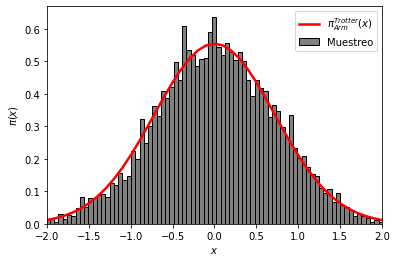

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):
  k = random.randint(0 , N-1)
  k_next , k_prev = (k + 1) % N, (k - 1) % N
  x_new = x[k] + random.uniform(-Δx , Δx)

  old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                ρ_free(x[k] , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x[k] , 2)))
    
  new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                ρ_free(x_new , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x_new , 2)))
    
  if random.uniform(0.0 , 1.0) < new_weight / old_weight:
    x[k] = x_new
    if k == 3 and Step % 10 == 0:
      X.append(x[k])

pylab.xlim(-2.0 , 2-0)
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor='gray')

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring , ρ_squaring) = read_file('data_harm_matrixsquaring_beta4.dat')

plt.plot(x_squaring , ρ_squaring, linewidth = 2.5, c = 'r')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "Muestreo"], loc ="upper right")

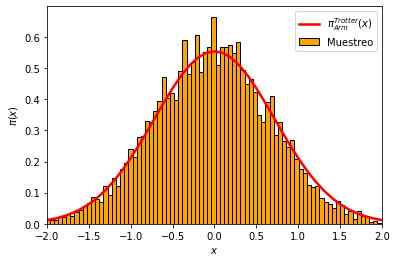

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):
  k = random.randint(0 , N-1)
  k_next , k_prev = (k + 1) % N, (k - 1) % N
  x_new = x[k] + random.uniform(-Δx , Δx)

  old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                ρ_free(x[k] , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x[k] , 2)))
    
  new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                ρ_free(x_new , x[k_prev] , Δτ) *
                math.exp(-0.5 * Δτ * pow(x_new , 2)))
    
  if random.uniform(0.0 , 1.0) < new_weight / old_weight:
    x[k] = x_new
    if k == 7 and Step % 10 == 0:
      X.append(x[k])

pylab.xlim(-2.0 , 2-0)
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor='orange')

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring , ρ_squaring) = read_file('data_harm_matrixsquaring_beta4.dat')

plt.plot(x_squaring , ρ_squaring, linewidth = 2.5, c = 'r')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "Muestreo"], loc ="upper right")

Todos los saltos

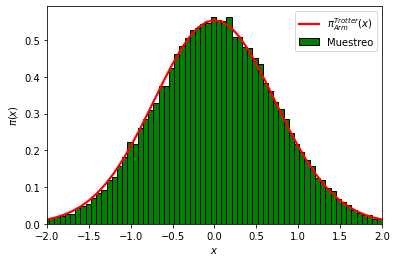

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):

#  if Step % 10 == 0:

    k = random.randint(0 , N-1)
    k_next , k_prev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-Δx , Δx)

    old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                  ρ_free(x[k] , x[k_prev] , Δτ) *
                  math.exp(-0.5 * Δτ * pow(x[k] , 2)))
    
    new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                  ρ_free(x_new , x[k_prev] , Δτ) *
                  math.exp(-0.5 * Δτ * pow(x_new , 2)))
    
    if random.uniform(0.0 , 1.0) < new_weight / old_weight:

        x[k] = x_new
        if Step % 10 == 0:
          X.append(x[k])

pylab.xlim(-2.0 , 2-0)
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor='green')

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring , ρ_squaring) = read_file('data_harm_matrixsquaring_beta4.dat')

plt.plot(x_squaring , ρ_squaring, linewidth = 2.2, c = 'r')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}_{Arm}(x)$", "Muestreo"], loc ="upper right")

Potencial anarmónico

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


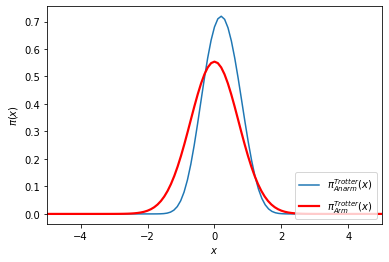

In [ ]:
import math, numpy, pylab
import matplotlib.pyplot as plt
 
def rho_free(x, xp, beta):
  return (math.exp(-(x -xp) ** 2 / (2.0 * beta) ) /
          math.sqrt(2.0 * math.pi * beta))
  
def rho_anharmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-(beta / 2) * ((x ** 2 + xp ** 2) / 2 -
                                               (x ** 3 + xp **3) + (x ** 4 + xp ** 4))) \
                         for x in grid] for xp in grid])
 
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range( -int( (nx - 1) / 2 + 1), int( (nx + 1) / 2 + 1) )]
 
beta_tmp = 2.0 ** (-5)
beta     = 4
rho = rho_anharmonic_trotter(x, beta_tmp)
 
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    print('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
 
Z = sum(rho[j,j] for j in range(nx+1)) * dx
pi_of_x = [rho[j,j] / Z for j in range(nx+1)]
f = open('data_harm_matrixsquaring_beta_anarmonic' + str(beta) + '.dat', 'w')
for j in range(nx+1):
    f.write(str(x[j]) + ' ' + str(rho[j,j] / Z) + '\n')
f.close()

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y


pylab.xlim(-5,5)
plt.plot(x , pi_of_x)

(x_squaring_harm , ρ_squaring_harm) = read_file('data_harm_matrixsquaring_beta4.dat')

plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.plot(x_squaring_harm , ρ_squaring_harm, linewidth = 2.2, c = 'r')
plt.legend(["$\pi^{Trotter}_{Anarm}(x)$" , "$\pi^{Trotter}_{Arm}(x)$"], loc ="lower right")

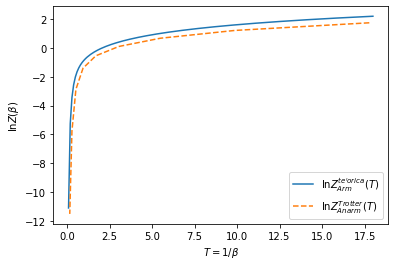

In [ ]:
import math, numpy
import matplotlib.pyplot as plt
import numpy as np

def rho_free(x, xp, beta):
  return (math.exp(-(x - xp) **2 / (2.0 * beta) ) /
          math.sqrt(2.0 * math.pi * beta))
  
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-(beta / 2) * ((x ** 2 + xp ** 2) / 2 -
                                               (x ** 3 + xp **3) + (x ** 4 + xp ** 4))) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range( -int( (nx - 1) / 2 + 1), int( (nx + 1) / 2 + 1) )]
 
beta_tmp = 2.0 ** (-5)
beta     = 4
rho = rho_harmonic_trotter(x, beta_tmp)

LnZ = []
Beta_TMP = []
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 1.8
    lnZ = math.log(sum(rho[j,j] for j in range(nx+1)) * dx)
    Beta_TMP.append(1/beta_tmp)
    LnZ.append(lnZ)

T = np.arange(0.09, 18,0.1)
y = np.log(1 / (2 * np.sinh(1/T)))

plt.plot(T,y)
plt.plot(Beta_TMP , LnZ, linestyle = '--')

plt.xlabel('$T = 1/β$')
plt.ylabel('$\ln Z(β)$')
plt.legend(["$\ln Z^{te\'orica}_{Arm}(T)$", "$\ln Z^{Trotter}_{Anarm}(T)$"], loc ="lower right")

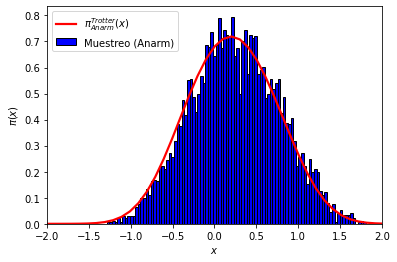

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):

    k = random.randint(0 , N-1)
    k_next , k_prev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-Δx , Δx)

    old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                  ρ_free(x[k] , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x[k] ** 2 / 2 -
                  x[k] ** 3 + x[k] ** 4)))
    
    new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                  ρ_free(x_new , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x_new ** 2 / 2 -
                  x_new ** 3 + x_new ** 4)))
    
    if random.uniform(0.0 , 1.0) < new_weight / old_weight:

      if Step % 10 == 0:
        x[k] = x_new

        if k == 0 and Step % 10 == 0:
            X.append(x[k])

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring_anharmonic , ρ_squaring_anharmonic) = read_file('data_harm_matrixsquaring_beta_anarmonic4.dat')


plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}(x)$", "$\pi^{Teórico}(x)$", "Muestreo"], loc ="upper right")

pylab.xlim(-2.0 , 2-0)
plt.plot(x_squaring_anharmonic , ρ_squaring_anharmonic, linewidth = 2.2, c = 'r')
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor = 'blue')
plt.legend(["$\pi^{Trotter}_{Anarm}(x)$", "Muestreo (Anarm)"], loc ="upper left")

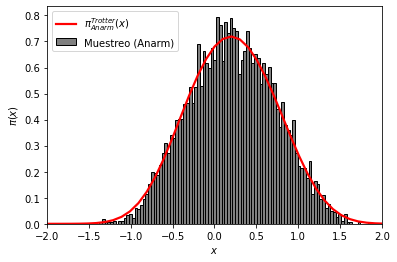

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):

    k = random.randint(0 , N-1)
    k_next , k_prev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-Δx , Δx)

    old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                  ρ_free(x[k] , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x[k] ** 2 / 2 -
                  x[k] ** 3 + x[k] ** 4)))
    
    new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                  ρ_free(x_new , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x_new ** 2 / 2 -
                  x_new ** 3 + x_new ** 4)))
    
    if random.uniform(0.0 , 1.0) < new_weight / old_weight:

      if Step % 10 == 0:
        x[k] = x_new

        if k == 3 and Step % 10 == 0:
            X.append(x[k])

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring_anharmonic , ρ_squaring_anharmonic) = read_file('data_harm_matrixsquaring_beta_anarmonic4.dat')


plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}(x)$", "$\pi^{Teórico}(x)$", "Muestreo"], loc ="upper right")

pylab.xlim(-2.0 , 2-0)
plt.plot(x_squaring_anharmonic , ρ_squaring_anharmonic, linewidth = 2.2, c = 'r')
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor = 'gray')
plt.legend(["$\pi^{Trotter}_{Anarm}(x)$", "Muestreo (Anarm)"], loc ="upper left")

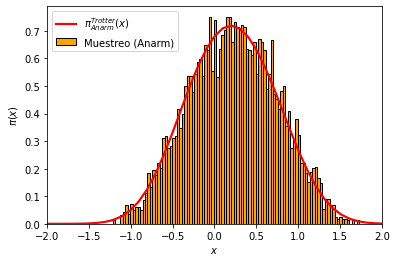

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):

    k = random.randint(0 , N-1)
    k_next , k_prev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-Δx , Δx)

    old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                  ρ_free(x[k] , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x[k] ** 2 / 2 -
                  x[k] ** 3 + x[k] ** 4)))
    
    new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                  ρ_free(x_new , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x_new ** 2 / 2 -
                  x_new ** 3 + x_new ** 4)))
    
    if random.uniform(0.0 , 1.0) < new_weight / old_weight:

      if Step % 10 == 0:
        x[k] = x_new

        if k == 7 and Step % 10 == 0:
            X.append(x[k])

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring_anharmonic , ρ_squaring_anharmonic) = read_file('data_harm_matrixsquaring_beta_anarmonic4.dat')


plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}(x)$", "$\pi^{Teórico}(x)$", "Muestreo"], loc ="upper right")

pylab.xlim(-2.0 , 2-0)
plt.plot(x_squaring_anharmonic , ρ_squaring_anharmonic, linewidth = 2.2, c = 'r')
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor = 'orange')
plt.legend(["$\pi^{Trotter}_{Anarm}(x)$", "Muestreo (Anarm)"], loc ="upper left")

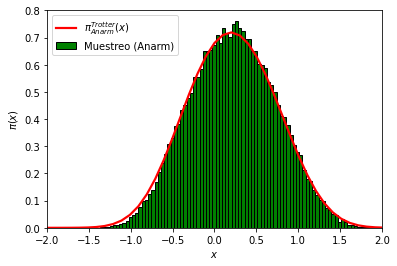

In [ ]:
import math, random, pylab
import matplotlib.pyplot as plt

def ρ_free(x, xp , β):
    return math.exp(-0.5 * pow(x - xp , 2) / β)


β = 4
N = 10
Δτ = β / N
Δx = 1
StepsNumber = pow(10 , 6)
x = [0.0] * N
X = []


for Step in range(StepsNumber):

    k = random.randint(0 , N-1)
    k_next , k_prev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-Δx , Δx)

    old_weight = (ρ_free(x[k_next] , x[k] , Δτ) *
                  ρ_free(x[k] , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x[k] ** 2 / 2 -
                  x[k] ** 3 + x[k] ** 4)))
    
    new_weight = (ρ_free(x[k_next] , x_new , Δτ) *
                  ρ_free(x_new , x[k_prev] , Δτ) *
                  math.exp(-Δτ * (x_new ** 2 / 2 -
                  x_new ** 3 + x_new ** 4)))
    
    if random.uniform(0.0 , 1.0) < new_weight / old_weight:

      if Step % 10 == 0:
        x[k] = x_new

        if Step % 10 == 0:
            X.append(x[k])

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
      for line in f:
        x , y = line.split()
        list_x.append(float(x))
        list_y.append(float(y))
    f.close()
    return list_x, list_y

(x_squaring_anharmonic , ρ_squaring_anharmonic) = read_file('data_harm_matrixsquaring_beta_anarmonic4.dat')


plt.xlabel('$x$')
plt.ylabel('$\pi(x)$')
plt.legend(["$\pi^{Trotter}(x)$", "$\pi^{Teórico}(x)$", "Muestreo"], loc ="upper right")

pylab.xlim(-2.0 , 2-0)
plt.plot(x_squaring_anharmonic , ρ_squaring_anharmonic, linewidth = 2.2, c = 'r')
plt.hist(X , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor = 'green')
plt.legend(["$\pi^{Trotter}_{Anarm}(x)$", "Muestreo (Anarm)"], loc ="upper left")